In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [2]:
car_train = pd.read_csv('../data/raw/car_train.csv')
car_train

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,9492.96,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,2656.23,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,1526.11,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,1338.00,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,825.72,engine_fuel
...,...,...,...,...,...,...,...,...,...,...
2332,j21246192N,Smart ForFour,economy,petrol,4.38,2017,121239,2018,547.30,wheel_shake
2333,h-1554287F,Audi A4,premium,petrol,4.30,2016,107793,2020,26414.19,engine_check
2334,A15262612g,Kia Rio,economy,petrol,3.88,2015,80234,2019,2677.95,gear_stick
2335,W-2514493U,Renault Sandero,standart,petrol,4.50,2014,60048,2020,2213.63,another_bug


### Посмотрим на описательную статистику по таблице car_train

In [3]:
car_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_id         2337 non-null   object 
 1   model          2337 non-null   object 
 2   car_type       2337 non-null   object 
 3   fuel_type      2337 non-null   object 
 4   car_rating     2337 non-null   float64
 5   year_to_start  2337 non-null   int64  
 6   riders         2337 non-null   int64  
 7   year_to_work   2337 non-null   int64  
 8   target_reg     2337 non-null   float64
 9   target_class   2337 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 182.7+ KB


In [4]:
car_train.describe()

,car_rating,year_to_start,riders,year_to_work,target_reg
count,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000
mean,4.354292,2014.040650,63711.443731,2018.069748,3824.600745
std,0.996954,1.685852,33755.012096,2.159484,6171.887272
min,0.980000,2011.000000,23.000000,2014.000000,225.540000
25%,3.740000,2013.000000,41053.000000,2016.000000,1215.790000
50%,4.360000,2014.000000,64415.000000,2018.000000,2352.100000
75%,5.000000,2015.000000,86515.000000,2020.000000,4334.850000
max,8.900000,2017.000000,142862.000000,2022.000000,104377.420000


### Построим визуализацию.

<Axes: title={'center': 'Car Rating distribution'}, xlabel='car_rating', ylabel='Count'>

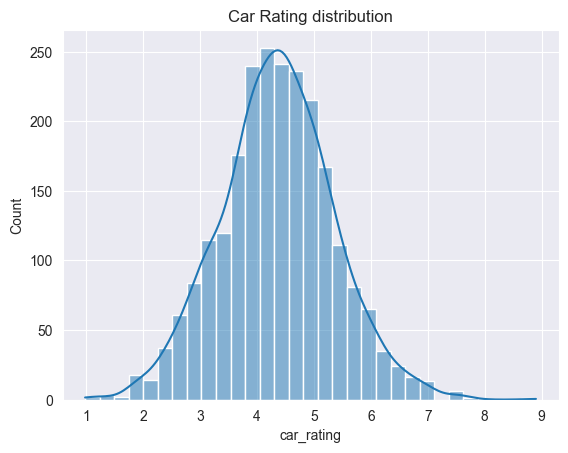

In [5]:
fig = sns.histplot(data=car_train, x='car_rating', bins=31, kde=True)
fig.set_title('Car Rating distribution')
fig

Мы видим нормальное распределение рейтинга автомобилей, это хорошо!

<Axes: title={'center': 'Target reg distribution'}, xlabel='target_reg', ylabel='Count'>

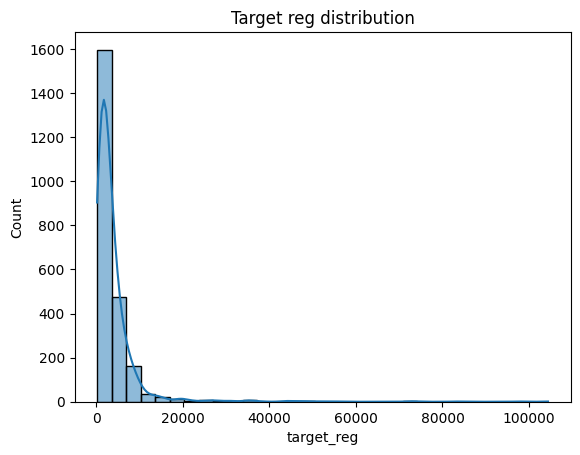

In [10]:
fig = sns.histplot(data=car_train, x='target_reg', bins=31, kde=True)
fig.set_title('Target reg distribution')
fig

Видно, что у некоторых авто время до поломки довольно большое, посмотрим подробнее

<Axes: ylabel='target_reg'>

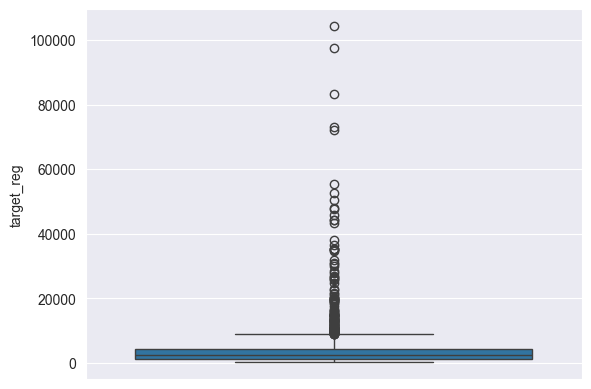

In [6]:
fig = sns.boxplot(data=car_train, y='target_reg')
fig

In [7]:
target_outliers = car_train[car_train['target_reg'] > 15000]

<Axes: title={'center': 'Outliers distribution of target reg'}, xlabel='target_reg', ylabel='Count'>

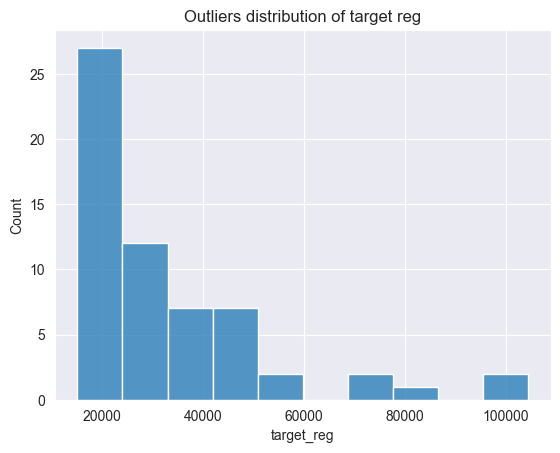

In [8]:
fig = sns.histplot(target_outliers, x='target_reg')
fig.set_title('Outliers distribution of target reg')
fig

Выдвинем гипотезу о том, что время до поломки сильно зависит от класса авто и проверим гипотезу

<Axes: title={'center': 'car_type distribution of target reg'}, xlabel='target_reg', ylabel='car_type'>

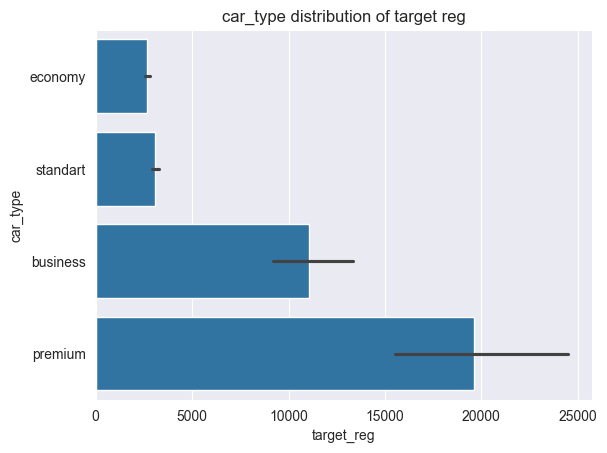

In [29]:
fig = sns.barplot(data=car_train,
                   y='car_type',
                   x='target_reg',
                   estimator=np.mean)
fig.set_title('car_type distribution of target reg')
fig

<Axes: title={'center': 'car_type distribution of target reg outliers'}, xlabel='target_reg', ylabel='car_type'>

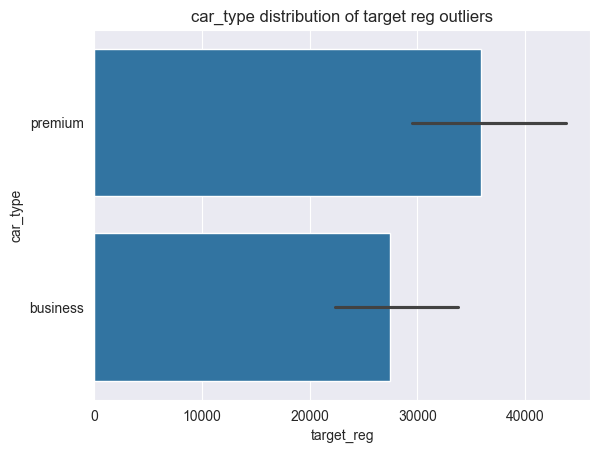

In [28]:
fig = sns.barplot(data=target_outliers,
                   y='car_type',
                   x='target_reg',
                   estimator=np.mean)

fig.set_title('car_type distribution of target reg outliers')
fig

Это действительно так, следовательно, стоит рассмотреть вариант создания отдельной модели для классов business и premium

Выделим business и premium в отдельную выборку.

In [23]:
elite_cars = car_train[(car_train['car_type'] == 'business') | (car_train['car_type'] == 'premium')]
common_cars = car_train[(car_train['car_type'] == 'economy') | (car_train['car_type'] == 'standart')]

Изучим влияние типа двигателя на время до поломки

<Axes: title={'center': 'Common cars fuel types'}, xlabel='target_reg', ylabel='fuel_type'>

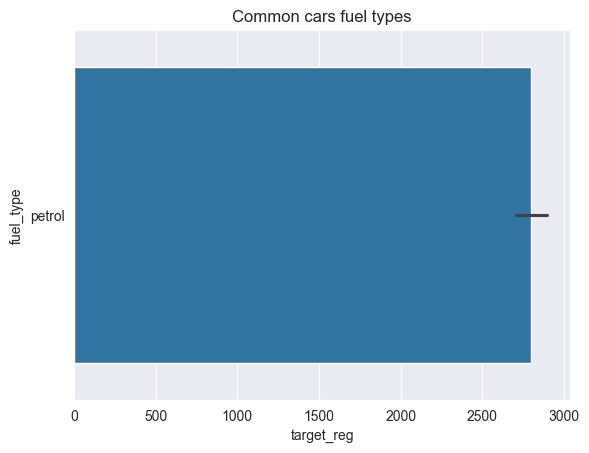

In [26]:
fig = sns.barplot(data=common_cars,
                   x='target_reg',
                   y='fuel_type',
                   estimator=np.mean)
fig.set_title('Common cars fuel types')
fig

<Axes: title={'center': 'Common cars fuel types'}, xlabel='target_reg', ylabel='fuel_type'>

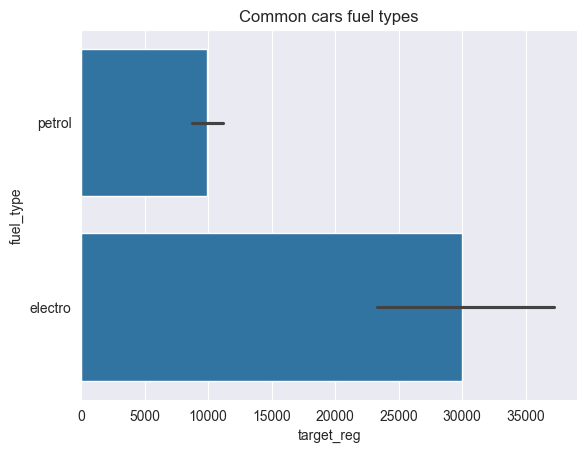

In [35]:
fig = sns.barplot(data=elite_cars,
                   x='target_reg',
                   y='fuel_type',
                   estimator=np.mean)
fig.set_title('Common cars fuel types')
fig

Изучим распределение target_reg для различных классов авто

<Axes: title={'center': 'Target reg distribution for elite cars'}, xlabel='target_reg', ylabel='Count'>

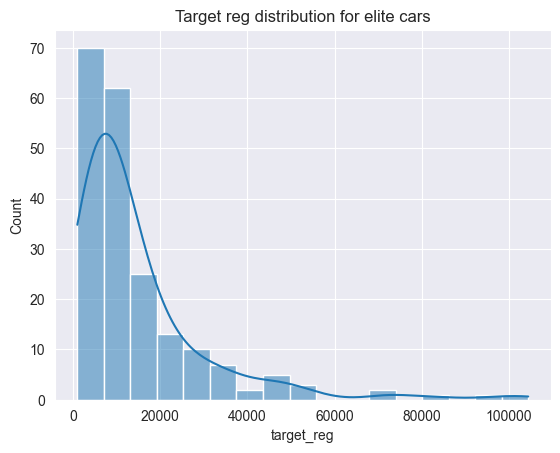

In [39]:
fig = sns.histplot(data=elite_cars,
                  x='target_reg',
                  kde=True,
                  bins=17)
fig.set_title('Target reg distribution for elite cars')
fig

<Axes: title={'center': 'Target reg distribution for common cars'}, xlabel='target_reg', ylabel='Count'>

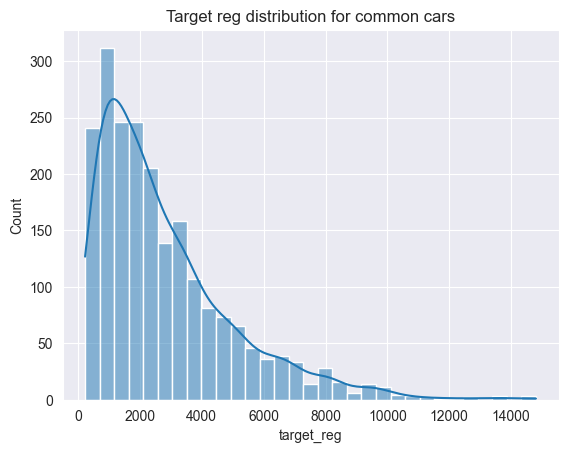

In [37]:
fig = sns.histplot(data=common_cars,
                  x='target_reg',
                  kde=True,
                  bins=31)
fig.set_title('Target reg distribution for common cars')
fig